In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.1


## 加载数据集

In [28]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
type(train_images)

numpy.ndarray

In [31]:
train_labels.shape

(60000,)

In [32]:
print("train image sample:\n ",train_images[0])
print("train label sample:\n",train_labels[0])

train image sample:
  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 

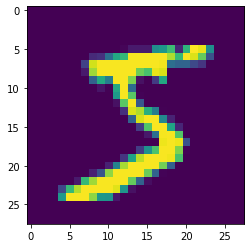

In [33]:
plt.imshow(train_images[0])

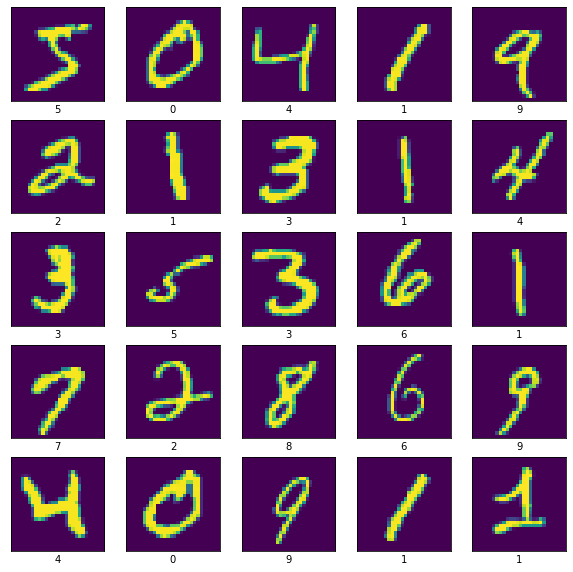

In [34]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

## 构造一个双层的前馈神经网络

In [35]:
def define_nn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(32, activation='relu'),        
        tf.keras.layers.Dense(10)
    ])
    return model

## 选择adam优化器，交叉熵损失函数，accuracy作为评价指标

In [36]:
model= define_nn_model()
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## 训练模型

In [37]:
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels), epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 4.7204 - accuracy: 0.2895 - val_loss: 2.3216 - val_accuracy: 0.2342
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 2.2660 - accuracy: 0.2511 - val_loss: 2.2264 - val_accuracy: 0.2700
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 2.2369 - accuracy: 0.2632 - val_loss: 2.2234 - val_accuracy: 0.2658
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 2.2414 - accuracy: 0.2632 - val_loss: 3.5037 - val_accuracy: 0.2309
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 2.5313 - accuracy: 0.2361 - val_loss: 2.2467 - val_accuracy: 0.2187
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 2.2543 - accuracy: 0.2135 - val_loss: 2.2467 - val_accuracy: 0.2186
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 2.2543 - accuracy: 0.2135 - val_loss: 2.2467 - val_accuracy: 0.2186
Epoch 

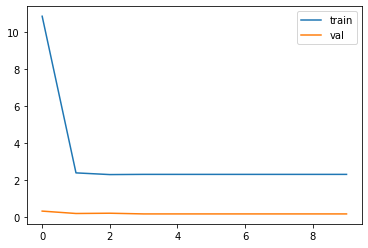

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])

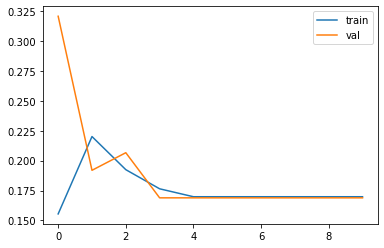

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])

In [61]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 778us/step - loss: 0.2675 - accuracy: 0.9282

Test accuracy: 0.9282000064849854


In [62]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

## 模型预测

In [63]:
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 611us/step


array([6.0052714e-09, 3.7170187e-06, 7.7061404e-06, 1.2901418e-05,
       6.7236137e-08, 1.0435244e-08, 2.4209872e-16, 9.9997485e-01,
       3.2976198e-22, 8.4721592e-07], dtype=float32)

predict label:7


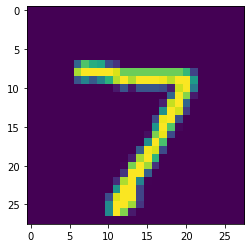

In [64]:
plt.imshow(test_images[0])
print("predict label:%d"%np.argmax(predictions[0]))

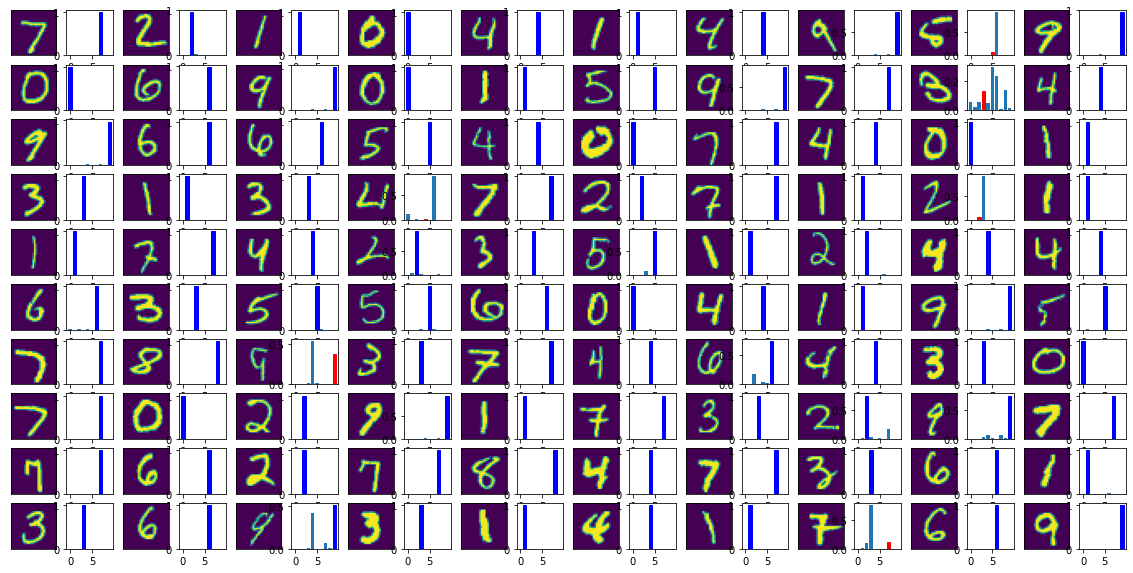

In [65]:
plt.figure(figsize=(20,20))
hit = 0
l = 10
for i in range(l*l):
    plt.subplot(2*l,2*l,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.grid(False)
    plt.subplot(2*l,2*l,2*i+2)
    predict_test_bar =plt.bar(range(10),predictions[i])
    if np.argmax(predictions[i]) == test_labels[i]:
        predict_test_bar[test_labels[i]].set_color('blue')
        hit += 1
    else:
        predict_test_bar[test_labels[i]].set_color('red')


## ========================================================================

## 构造一个卷积神经网络

In [ ]:
def define_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=5, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model

In [ ]:
cnn_model = define_cnn_model()
cnn_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
cnn_model.summary()

## 训练模型

In [72]:
cnn_model.fit(train_images.reshape((60000,28,28,1)),train_labels,epochs=15,validation_data=(test_images.reshape((10000,28,28,1)),test_labels),batch_size=128)

Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 3.2653 - accuracy: 0.7219 - val_loss: 0.5420 - val_accuracy: 0.8726
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.5353 - accuracy: 0.8702 - val_loss: 0.3416 - val_accuracy: 0.9206
Epoch 3/15
469/469 [==============================] - 6s 13ms/step - loss: 0.3579 - accuracy: 0.9099 - val_loss: 0.2591 - val_accuracy: 0.9399
Epoch 4/15
469/469 [==============================] - 6s 13ms/step - loss: 0.2635 - accuracy: 0.9296 - val_loss: 0.2083 - val_accuracy: 0.9465
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.2225 - accuracy: 0.9391 - val_loss: 0.1661 - val_accuracy: 0.9591
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1893 - accuracy: 0.9481 - val_loss: 0.1583 - val_accuracy: 0.9614
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1695 - accuracy: 0.9524 - val_loss: 0.1371 - val_accuracy: 0.9644

In [29]:
test_loss, test_acc = cnn_model.evaluate(test_images.reshape((10000,28,28,1)),  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.1271 - accuracy: 0.9745 - 2s/epoch - 5ms/step

Test accuracy: 0.9745000004768372


In [30]:
probability_model = tf.keras.Sequential([cnn_model,tf.keras.layers.Softmax()])

## 模型预测

In [31]:
predictions = probability_model.predict(test_images.reshape((10000,28,28,1)))
predictions[0]

313/313 [==============================] - 1s 4ms/step


array([6.9090573e-14, 2.9131714e-19, 2.1077122e-12, 1.0198620e-10,
       3.9905980e-16, 3.0884246e-18, 6.0492171e-26, 1.0000000e+00,
       1.1581445e-13, 5.1192658e-11], dtype=float32)

predict label:7


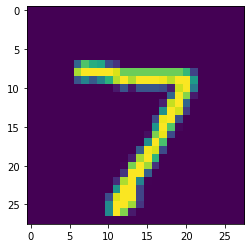

In [32]:
plt.imshow(test_images[0])
print("predict label:%d"%np.argmax(predictions[0]))

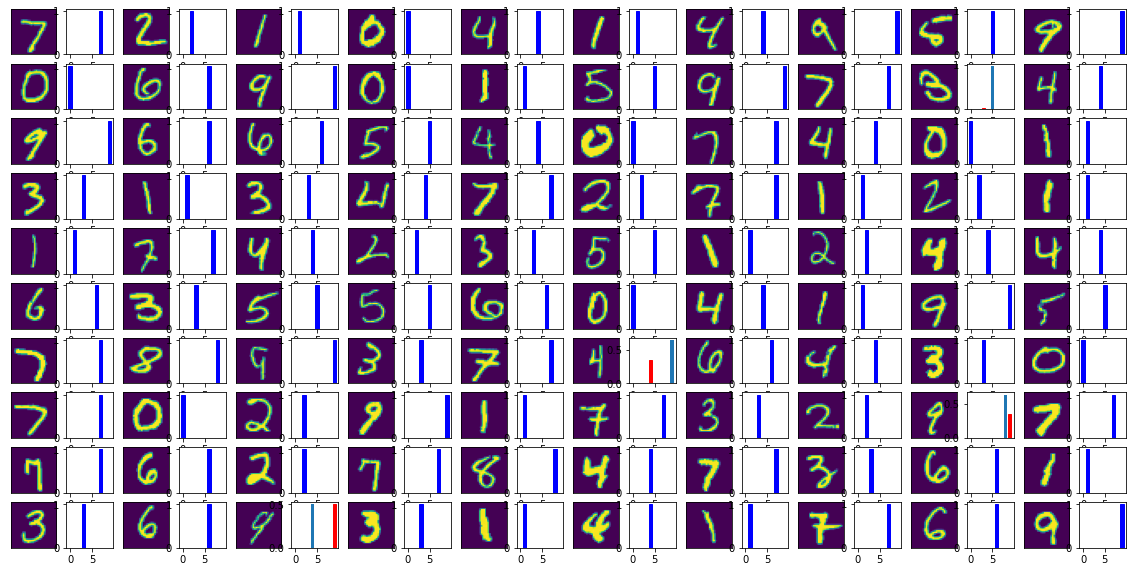

In [33]:
plt.figure(figsize=(20,20))
hit = 0
l = 10
for i in range(l*l):
    plt.subplot(2*l,2*l,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.grid(False)
    plt.subplot(2*l,2*l,2*i+2)
    predict_test_bar =plt.bar(range(10),predictions[i])
    if np.argmax(predictions[i]) == test_labels[i]:
        predict_test_bar[test_labels[i]].set_color('blue')
        hit += 1
    else:
        predict_test_bar[test_labels[i]].set_color('red')


In [34]:
hit = 0
test_len = len(test_images)
for i in range(test_len):
    if np.argmax(predictions[i]) == test_labels[i]:
        hit += 1
print('\nTest Accuracy:',hit/test_len)


Test Accuracy: 0.9745
